In [53]:
import casadi as ca

x = ca.SX.sym('x')
obj =  x**2 - 6*x + 13

# optimization constraints
g = []
p = []

OPT_VARIABLES = x
nlprob = {'f': obj, 'x': OPT_VARIABLES, 'g': g, 'p': p}

In [54]:
opts = {
    'ipopt': {
        'max_iter': 1000,
        'print_level': 0,
        'acceptable_tol': 1e-8,
        'acceptable_obj_change_tol': 1e-6
    },
    'print_time': 0
}

solver = ca.nlpsol('solver', 'ipopt', nlprob, opts)

In [55]:
ubx = ca.DM.zeros((1, 1))
lbx = ca.DM.zeros((1, 1))
lbg = ca.DM.zeros((1, 1))
ubg = ca.DM.zeros((1, 1))

lbx[0] = -ca.inf
ubx[0] = ca.inf
lbg[0] = -ca.inf
ubg[0] = ca.inf

p = []
x0 = -0.5

sol = solver(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

3
4


In [56]:
x = ca.SX.sym('x')
obj =  ca.exp(0.2*x)*ca.sin(x)

# optimization constraints
g = []
p = []

OPT_variables = x
nlprob = {'f': obj, 'x': OPT_variables, 'g': g, 'p': p}

opts = {
    'ipopt': {
        'max_iter': 1000,
        'print_level': 0,
        'acceptable_tol': 1e-8,
        'acceptable_obj_change_tol': 1e-6
    },
    'print_time': 0
}

solver = ca.nlpsol('solver', 'ipopt', nlprob, opts)

ubx = ca.DM.zeros((1, 1))
lbx = ca.DM.zeros((1, 1))
lbg = ca.DM.zeros((1, 1))
ubg = ca.DM.zeros((1, 1))

lbx[0] = 0
ubx[0] = 4*ca.pi
lbg[0] = -ca.inf
ubg[0] = ca.inf

p = []

x0 = 0
print("x0= ", x0)
sol = solver(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

x0 = 4
print("\r\nx0= ", x0)
sol = solver(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

x0 = 10
print("\r\nx0= ", x0)
sol = solver(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

x0=  0
-7.4924e-09
-7.4924e-09

x0=  4
4.90978
-2.61783

x0=  10
11.193
-9.19798


# linear regression

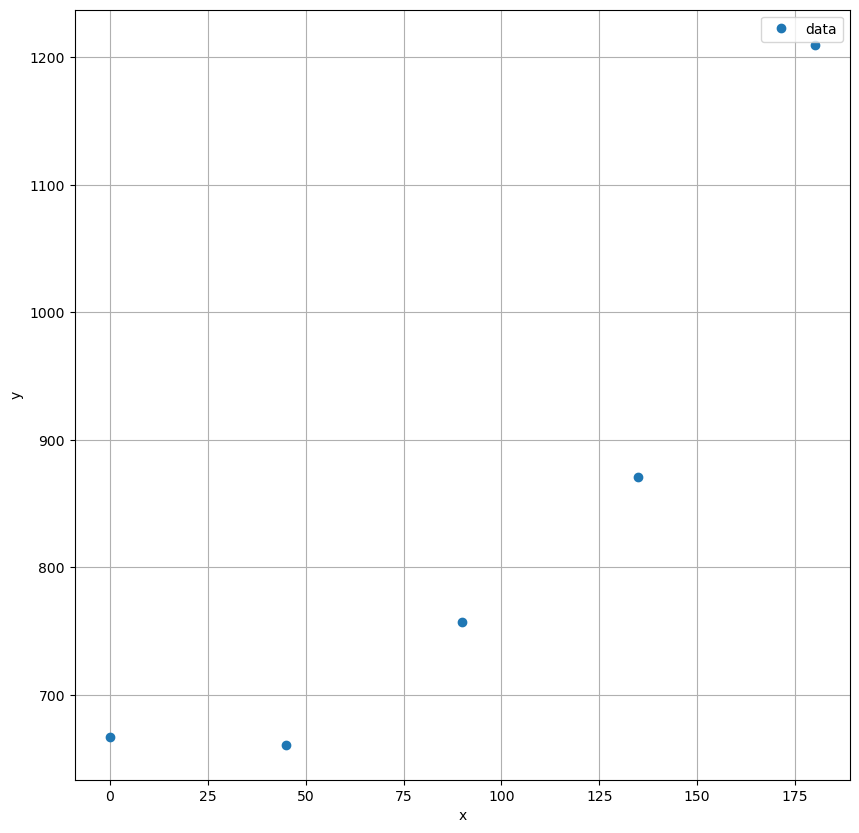

In [57]:
import matplotlib.pyplot as plt
import casadi as ca
%matplotlib inline

x = [0,45,90,135,180]
y = [667,661,757,871,1210]

line_width = 1.5

plt.figure()
plt.plot(x,y,'o',label='data',linewidth=line_width)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

[[2.88, 574]]
38527.2


Text(0.5, 0, 'x')

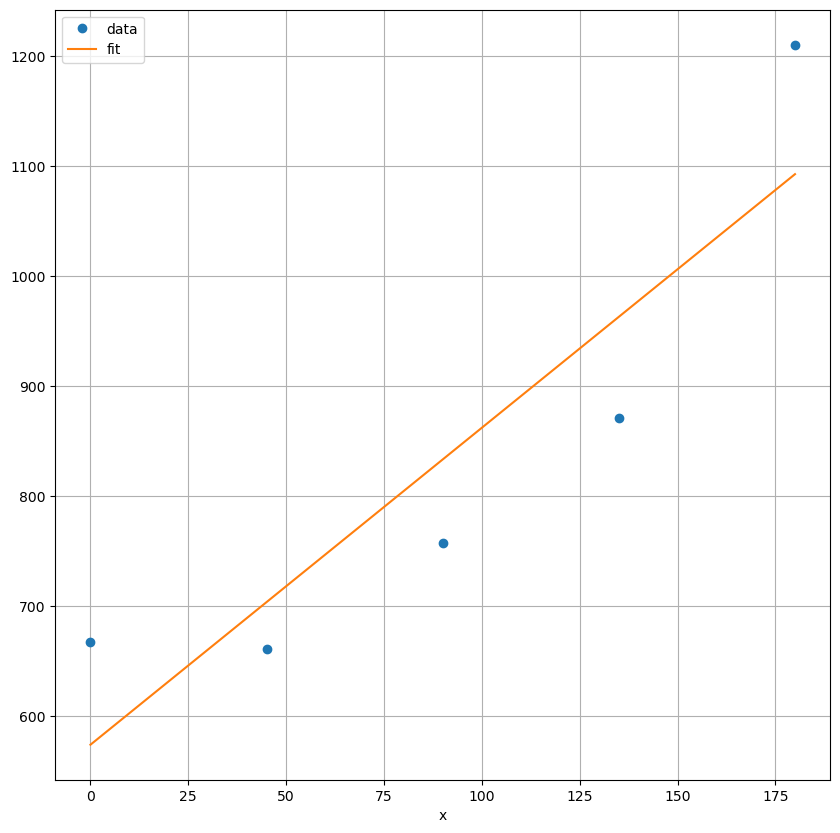

In [58]:
m = ca.SX.sym('m')
c = ca.SX.sym('c')

obj = 0
for i in range(len(x)):
    obj += (y[i] - (m*x[i] + c))**2

g = []
p = []

OPT_variables = ca.horzcat(m,c)
nlprob = {'f': obj, 'x': OPT_variables, 'g': g, 'p': p}

opt = {
    'ipopt': 
    {
        'max_iter': 1000, 
        'print_level': 0, 
        'acceptable_tol': 1e-8, 
        'acceptable_obj_change_tol': 1e-6}, 
        'print_time': 0
}

lbx = ca.DM.zeros((2, 1))
ubx = ca.DM.zeros((2, 1))
lbg = ca.DM.zeros((1, 1))
ubg = ca.DM.zeros((1, 1))

lbx[0] = -ca.inf
ubx[0] = ca.inf
lbx[1] = -ca.inf
ubx[1] = ca.inf
lbg[0] = -ca.inf
ubg[0] = ca.inf

p = []
x0 = [0.5,1]

sol = ca.nlpsol('solver', 'ipopt', nlprob, opt)
sol = sol(x0=x0, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=p)
x_sol = sol['x']
print(x_sol)
value = sol['f']
print(value)

import numpy as np
x_line = np.linspace(0,180,100)
y_line = x_sol[0]*x_line + x_sol[1]

plt.figure()
plt.plot(x,y,'o',label='data',linewidth=line_width)
plt.plot(x_line,y_line,label='fit',linewidth=line_width)
plt.legend()
plt.grid()
plt.xlabel('x')

# Objective Visualization

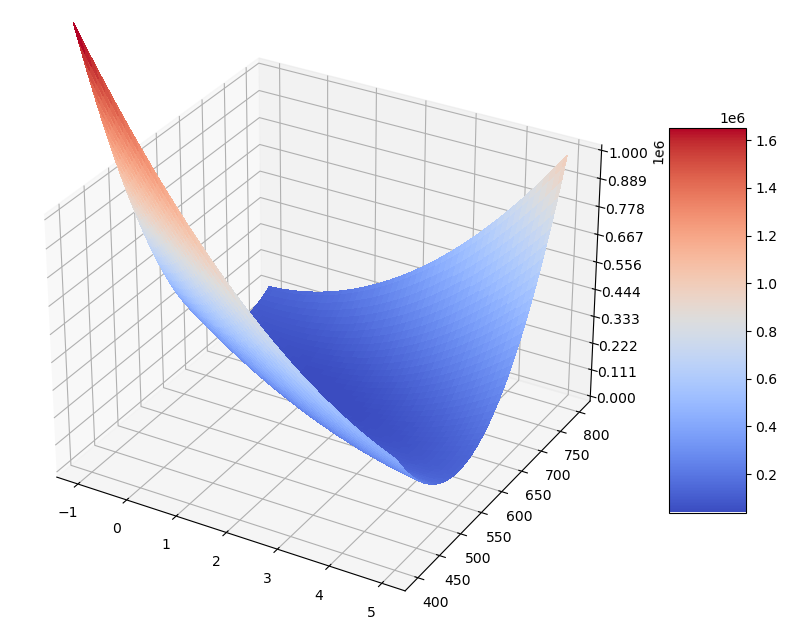

In [59]:
obj_fun = ca.Function('obj_fun', [m,c], [obj])

x_range = np.linspace(-1,5,100)
y_range = np.linspace(400,800,100)

X,Y = np.meshgrid(x_range,y_range)
Z = np.zeros((len(x_range),len(y_range)))

for i in range(len(x_range)):
    for j in range(len(y_range)):
        Z[i,j] = obj_fun(x_range[i],y_range[j])

from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Plot the surface.
# set the plot size
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1e6)
ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


# below is the test code part

The average time is:  0.0008790468806542721


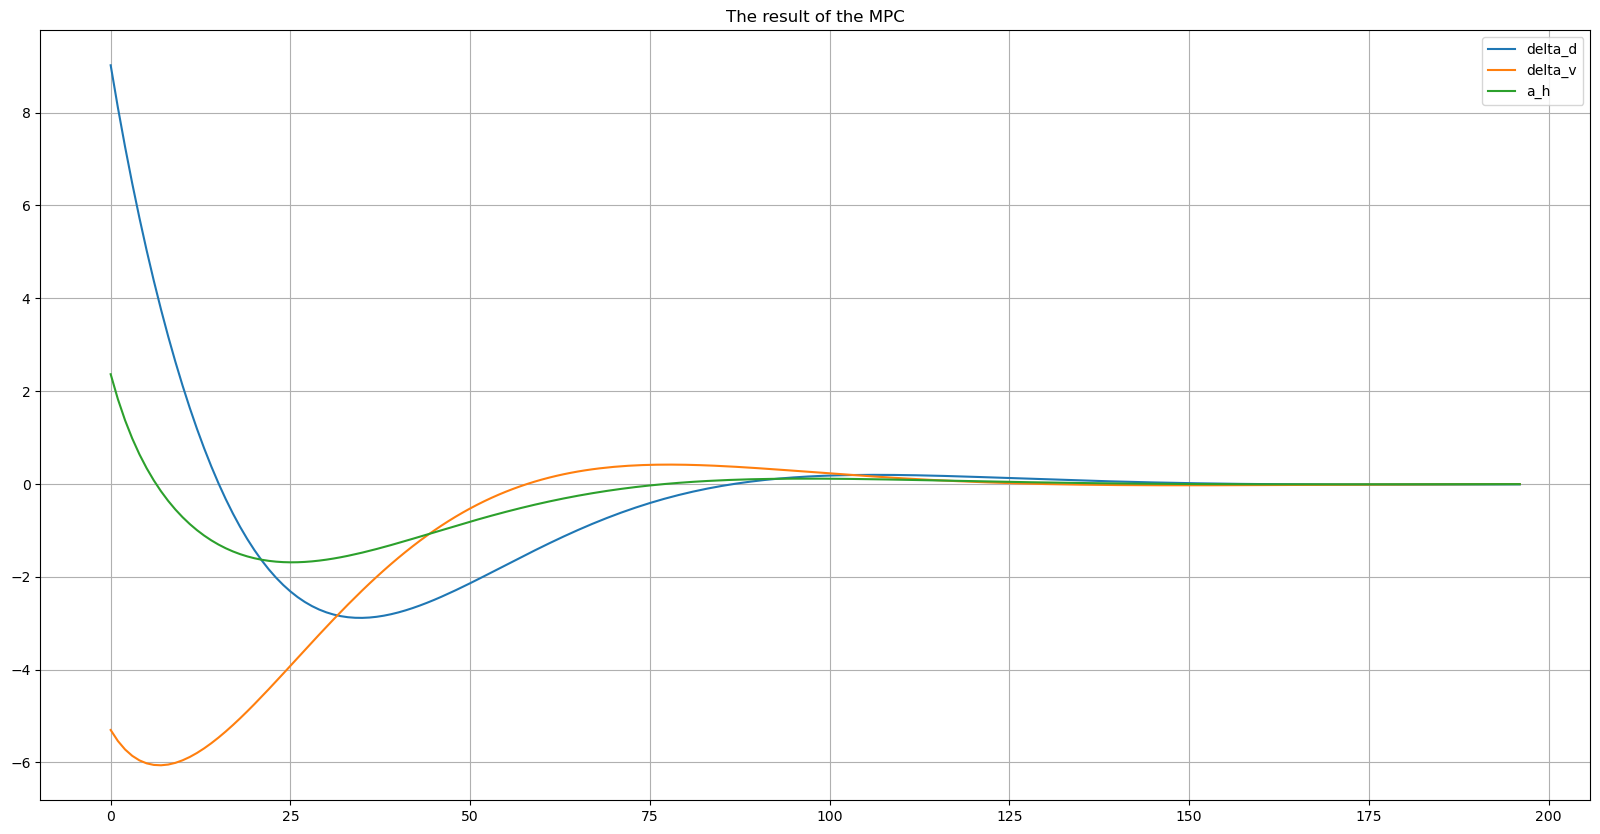

In [127]:
import casadi as ca
import numpy as np

from time import time

# MPC variables
N = 10  # prediction horizon
h = 0.1  # sampling time

# define the states value
# the distance between actual position and the target position
delta_d = ca.SX.sym('delta_d')
# the distance between host car velocity and the preceding car velocity
delta_v = ca.SX.sym('delta_v')
# the acceleration of the host car
a_h = ca.SX.sym('a')
# the states of the vehicle
states = ca.vertcat(delta_d, delta_v, a_h)
n_states = states.numel()

# define the input
u = ca.SX.sym('u')
n_controls = u.numel()

# define the increment
A = ca.DM([
    [0, 1, -1.6],
    [0, 0, -1],
    [0, 0, -2.17391304]
])
# B matrix
B = ca.DM([0, 0, -1.59130435])
# the increment of the states
increment = A @ states @ h + B @ u @ h
# calculate the increment of the states
f = ca.Function('f', [states, u], [increment])

# define the parameters
# current initial state and the target state and Q and R
P = ca.SX.sym('P', n_states+n_states+n_states+n_controls)
X = ca.SX.sym('X', n_states,(N+1))
U = ca.SX.sym('U', n_controls,N)

# Q and R is the weight of the cost function, we take it from P
initial_state = P[0:n_states] # the first 3 number is the initial state
reference = P[n_states:2*n_states] # the next 3 number is the target state
Q = ca.diag(P[2*n_states:2*n_states+n_states]) # the next 3 number is Q
R = ca.diag(P[-1]) # the last number is R

# initial state
st = X[:,0]
# initial condition constraints
g = st - initial_state

# the cost function and the constraint funtion
obj = 0
for k in range(N):
    # current state
    st = X[:,k]
    # current control
    ctrl = U[:,k]

    # the cost function
    obj = obj + \
        (st-reference).T @ Q @ (st-reference) + \
        ctrl.T @ R @ ctrl

    # next state
    st_next = X[:,k+1]
    # we can use runge kutta there if the model is nonlinear
    next_st = st + f(st, ctrl)
    # the constraint function
    g = ca.vertcat(g, st_next - next_st)

# opt variables
OPT_variables = ca.vertcat(ca.reshape(X,-1,1), ca.reshape(U,-1,1))
nlp_prob = {'f': obj, 'x': OPT_variables, 'g': g, 'p': P}

# solver options
opts = {
    'ipopt':
    {
        'max_iter': 1000,
        'print_level': 0,
        'acceptable_tol': 1e-8,
        'acceptable_obj_change_tol': 1e-6
    },
    'print_time': 0
}

# create solver
solver = ca.nlpsol('solver', 'ipopt', nlp_prob, opts)

# boundaries
lbx = ca.DM.zeros(OPT_variables.shape)
ubx = ca.DM.zeros(OPT_variables.shape)

lbx[0:n_states*(N+1):n_states] = -ca.inf # delta_d lower bound
lbx[1:n_states*(N+1):n_states] = -ca.inf # delta_v lower bound
lbx[2:n_states*(N+1):n_states] = -ca.inf # a_h lower bound

ubx[0:n_states*(N+1):n_states] = ca.inf # delta_d upper bound
ubx[1:n_states*(N+1):n_states] = ca.inf # delta_v upper bound
ubx[2:n_states*(N+1):n_states] = ca.inf # a_h upper bound


lbx[n_states*(N+1):] = -ca.inf # u lower bound
ubx[n_states*(N+1):] = ca.inf # u upper bound

args = {'lbx': lbx, 'ubx': ubx, 'lbg': 0, 'ubg': 0}

state_init = ca.DM([10, -5, 3])
state_ref = ca.DM([0, 0, 0])

delta_ds = []
delta_vs = []
a_hs = []
state_inits = []
record_time = []

import numpy as np
while (ca.norm_2(state_init-state_ref) > 0.01):
    # start time
    start_time = time()
    # set the initial state and the target state
    p = ca.vertcat(state_init, state_ref, ca.DM([1, 1, 1]), ca.DM([1]))
    args['p'] = p
    args['x0'] = ca.vertcat(ca.repmat(state_init, N+1, 1), ca.DM.zeros(n_controls*N))
    # solve the problem
    sol = solver(**args)
    # get the solution
    u_opt = sol['x'][n_states*(N+1):]
    # get the first control input
    u0 = u_opt[0]
    # update the state
    state_init = state_init + f(state_init, u0)
    # append the list convert the casadi to numpy
    state_inits.append(state_init.full())
    # end time
    end_time = time()
    # record the time
    record_time.append(end_time-start_time)


import matplotlib.pyplot as plt
%matplotlib inline

# convert to list
state_inits = [state_init.tolist() for state_init in state_inits]

for state_init in state_inits:
    delta_ds.append(state_init[0])
    delta_vs.append(state_init[1])
    a_hs.append(state_init[2])

a =[]
b =[]
c =[]
for i in range(len(delta_ds)):
    a.append(delta_ds[i][0])
    b.append(delta_vs[i][0])
    c.append(a_hs[i][0])

# print the average time
print('The average solving time is: ', np.mean(record_time))

# plot the result
plt.figure(figsize=(20, 10))
plt.plot(a, label='delta_d')
plt.plot(b, label='delta_v')
plt.plot(c, label='a_h')
plt.title('The result of the MPC')
plt.grid()
plt.legend()
